important 変数を個々に定義する

In [1]:
SensorNum=3 # Sensor number
SampleNum=32 # Window Width
Overlap=0.5 # overlap
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

# chopin
#WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

# mozart
WORKSPACE_PATH = "/home/takeyama/Documents/01_SyncChopin/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN 4007)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)
ArrayAxis = Axis.split(",")

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time/')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**前回やった学習をもう１度やってみる**

Graph range=0 : 50945
Graph range=50945 : 101890
Graph range=101890 : 152835
Graph range=152835 : 203780
Graph range=203780 : 254725
Graph range=254725 : 305670
Graph range=305670 : 356615
Graph range=356615 : 407560
Graph range=407560 : 458505
Graph range=458505 : 509450
Graph range=509450 : 560395
Graph range=560395 : 611340
Graph range=611340 : 662285
Graph range=662285 : 713230
Graph range=713230 : 764175
Graph range=764175 : 815120
Graph range=815120 : 866065
Graph range=866065 : 917010
Graph range=917010 : 967955
Graph range=967955 : 1018900
Graph range=0 : 50945
Graph range=50945 : 101890
Graph range=101890 : 152835
Graph range=152835 : 203780
Graph range=203780 : 254725
Graph range=254725 : 305670
Graph range=305670 : 356615
Graph range=356615 : 407560
Graph range=407560 : 458505
Graph range=458505 : 509450
Graph range=509450 : 560395
Graph range=560395 : 611340
Graph range=611340 : 662285
Graph range=662285 : 713230
Graph range=713230 : 764175
Graph range=764175 : 815120
Graph

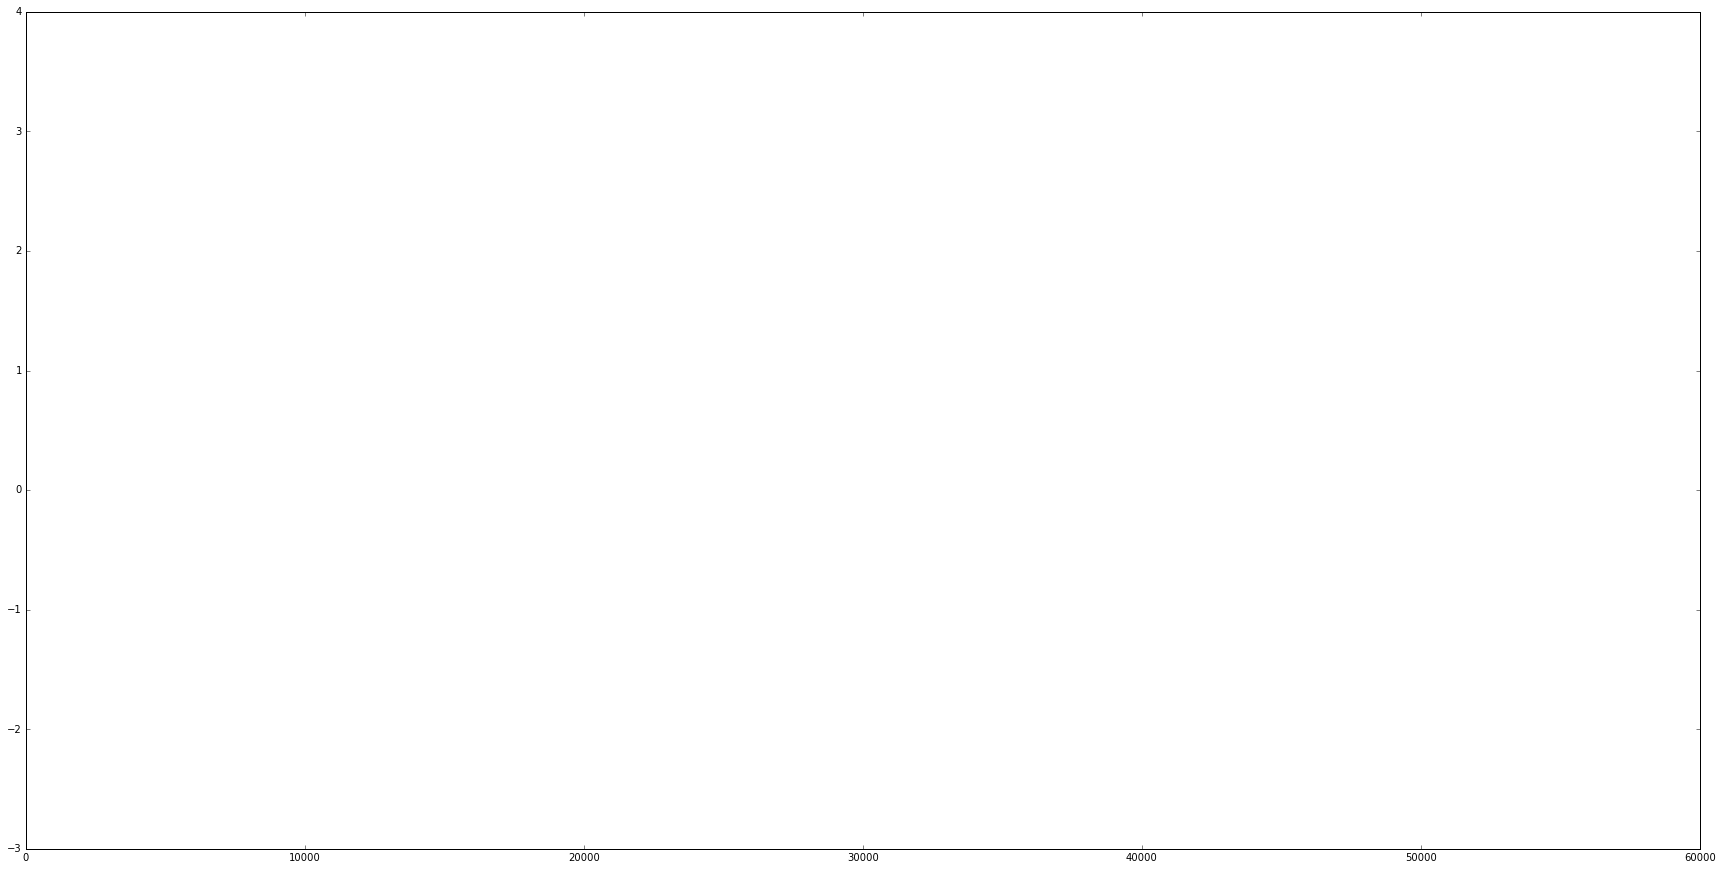

In [6]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(111)

for AxisName,WindowNum in zip(ArrayAxis,range(3)):
    for SampleNum,Overlap in zip(WindowWidth,OverlapArray):

        for encoding_dim in EncodingDim:
            # define SaveFileName
            commonLabel='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+commonLabel
            SaveFileNameDecord=DataName+'_decoded'+commonLabel
            SaveFileNameNet=DataName+'_net'+commonLabel
            SaveFileNameTrain=DataName+'_train'+commonLabel
            SaveFileNameTest=DataName+'_test'+commonLabel
            SaveFileNameGraph=GlaphDataPath+ DataName+commonLabel
            # load train data
            window = processing.LoadDicDataFromFileNPZ(WindowDataPath+SaveFileNameTrain+'.npz')
            rawData = window.reshape(window.size,1)

            # AutoEncoder Output
            reconstructData = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameDecord+'.npz')
            reconstructData = reconstructData.reshape(reconstructData.size,1)
            width=rawData.size/20 # graph width 
            for i in range(width,rawData.size,width):
                start =i-width 
                goal=i

                dataE = rawData[start:goal]
                dataD = reconstructData[start:goal]


                ax.plot(range(0,len(dataE)),dataE,'r',label="raw data")
                ax.plot(range(0,len(dataD)),dataD,'b',label="reconstruct")
                ax.legend(loc='best',fontsize=40)
                ax.set_title(str(start)+"-"+str(goal))
                ax.figure.savefig(SaveFileNameGraph+'-'+str(start)+"-"+str(goal)+'-'+'graph.jpg')
                ax.clear()
                print 'Graph range='+str(start)+' : '+str(goal)
                time.sleep(3)

In [7]:
print "finish"

finish
